In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../MovieRecommendation/Movies.csv')

# Movie Recommendations


แหล่งข้อมูลได้มาจาก IMDB ด้วยจำนวนหนังมากกว่า 5000 เรื่อง 

In [3]:
data.columns

Index(['color', 'ชื่อผู้กำกับ', 'จำนวนนักวิจารณ์', 'ระยะเวลา', 'คนชอบผู้กำกับ',
       'คนชอบนักแสดงที่3', 'ชื่อนักแสดงที่2', 'คนที่ชอบนักแสดงคนที่1',
       'รายได้', 'ประเภท', 'ชื่อนักแสดงที่1', 'ชื่อหนัง', 'คนทั่วไปโหวต',
       'คนชื่นชอบ', 'ชื่อนักแสดงที่3', 'จำนวนหน้านักแสดงบนโปสเตอร์',
       'คีเวิร์ด', 'IMDB link', 'จำนวนคนมาวิจารณ์', 'ภาษา', 'ประเทศ',
       'คะแนนเนื้อหา', 'งบประมาณการสร้าง', 'หนังปี', 'คนชอบนักแสดงคนที่2',
       'คะแนน IMDB', 'สเกลหน้าจอ', 'คนชอบหนัง'],
      dtype='object')

In [4]:
data.head(5)

color       ชื่อผู้กำกับ  จำนวนนักวิจารณ์  ระยะเวลา  คนชอบผู้กำกับ  \
0  Color      James Cameron            723.0     178.0            0.0   
1  Color     Gore Verbinski            302.0     169.0          563.0   
2  Color         Sam Mendes            602.0     148.0            0.0   
3  Color  Christopher Nolan            813.0     164.0        22000.0   
4    NaN        Doug Walker              NaN       NaN          131.0   

   คนชอบนักแสดงที่3   ชื่อนักแสดงที่2  คนที่ชอบนักแสดงคนที่1       รายได้  \
0             855.0  Joel David Moore                 1000.0  760505847.0   
1            1000.0     Orlando Bloom                40000.0  309404152.0   
2             161.0      Rory Kinnear                11000.0  200074175.0   
3           23000.0    Christian Bale                27000.0  448130642.0   
4               NaN        Rob Walker                  131.0          NaN   

                            ประเภท    ...    จำนวนคนมาวิจารณ์     ภาษา  \
0  Action|Adventure|Fantasy|Sci-Fi    ...              3054.0  English   
1         Action|Adventure|Fantasy    ...              1238.0  English   
2        Action|Adventure|Thriller    ...               994.0  English   
3                  Action|Thriller    ...              2701.0  English   
4                      Documentary    ...                 NaN      NaN   

   ประเทศ  คะแนนเนื้อหา งบประมาณการสร้าง  หนังปี คนชอบนักแสดงคนที่2  \
0     USA         PG-13      237000000.0  2009.0              936.0   
1     USA         PG-13      300000000.0  2007.0             5000.0   
2      UK         PG-13      245000000.0  2015.0              393.0   
3     USA         PG-13      250000000.0  2012.0            23000.0   
4     NaN           NaN              NaN     NaN               12.0   

  คะแนน IMDB  สเกลหน้าจอ คนชอบหนัง  
0        7.9        1.78     33000  
1        7.1        2.35         0  
2        6.8        2.35     85000  
3        8.5        2.35    164000  
4        7.1         NaN         0  

[5 rows x 28 columns]

In [5]:
# จำนวนข้อมูลบางส่วนที่หายไป
sum(data.isnull().sum())

2698

### จากตัวอย่างข้างต้น 
เราจะเห็นว่า มีหนังบางเรื่องที่ มีข้อมูลบางส่วนขาดไป รวมแล้ว 2698 ช่องด้วยกัน ซึ่งถ้าเรานำข้อมูลส่วนนี้ไปใช้เลย จะทำให้เกิดความคลาดเคลื่อนได้ ดังนั้นที่เราจะทำ คือการเติมข้อมูลช่องที่ว่าง ด้วย เทคนิค `Regression & Classifier`

In [6]:
from sklearn.preprocessing import LabelEncoder

ex = ['ชื่อหนัง', 'จำนวนนักวิจารณ์', 'ระยะเวลา', 'กำไรทั้งหมด', 'คะแนน IMDB']

def OneHotEncoder(df, col):
    for c in col:
        # if not number 
        if c not in ex:
            df[c] = df[c].fillna('Unknow')
            encoder = LabelEncoder()
            encoder.fit(df[c])
            df[c] = encoder.transform(df[c])
        else:
            df[c] = df[c].fillna(df[c].mean(axis=0))
    return df

# เนื่องจาก เราต้องการตัวแปรที่บ่งบอกถึงความสำเร็จ เราจึงควรใช้ กำไร แทนที่จะใช้ รายได้
data['กำไรทั้งหมด'] = data['รายได้'] - data['งบประมาณการสร้าง']
data = data.drop(['รายได้', 'งบประมาณการสร้าง'], axis=1)

# ใช้ เฉพาะ column ที่เราจะใช้พิจารณา
data = data[['ชื่อผู้กำกับ', 'จำนวนนักวิจารณ์', 'ระยะเวลา', 'กำไรทั้งหมด', 'ประเภท', 'ชื่อหนัง'\
       , 'คะแนน IMDB', 'ชื่อนักแสดงที่1', 'ชื่อนักแสดงที่2', 'ชื่อนักแสดงที่3', 'ภาษา']]

# แยกประเภทหนัง
genre = set()
for v in data['ประเภท'].str.split('|').values:
    genre |= set(v)
for label in genre:
    data['ประเภท: '+label] = data['ประเภท'].str.contains(label).astype(int)
data = data.drop('ประเภท', axis=1)

### top 5 movie

In [8]:
# top5 หนังที่ได้รายได้มากสุด
data[['ชื่อหนัง', 'กำไรทั้งหมด']][np.isfinite(data['กำไรทั้งหมด'])].sort_values('กำไรทั้งหมด', ascending = False).head(5)
# print(len(data['ชื่อผู้กำกับ'].unique()))

ชื่อหนัง  กำไรทั้งหมด
0                                 Avatar   523505847.0
29                        Jurassic World   502177271.0
26                               Titanic   458672302.0
3024  Star Wars: Episode IV - A New Hope   449935665.0
3080          E.T. the Extra-Terrestrial   424449459.0

### ตัวอย่าง
ผู้กำกับ James Cameron


In [9]:
# ยกตัวอย่าง กำไรหนัง ของ James Cameron
data[['ชื่อหนัง', 'กำไรทั้งหมด']][data['ชื่อผู้กำกับ'] == 'James Cameron']

ชื่อหนัง  กำไรทั้งหมด
0                         Avatar   523505847.0
26                       Titanic   458672302.0
288   Terminator 2: Judgment Day   102843350.0
291                    True Lies    31282411.0
606                    The Abyss   -15278000.0
2486                      Aliens    66700000.0
3575              The Terminator    31900000.0

### ตัวอย่าง 
ผู้กำกับ Christopher Nolan 

                             กำไรของหนังแต่ละเรื่องของ Christopher Nolan


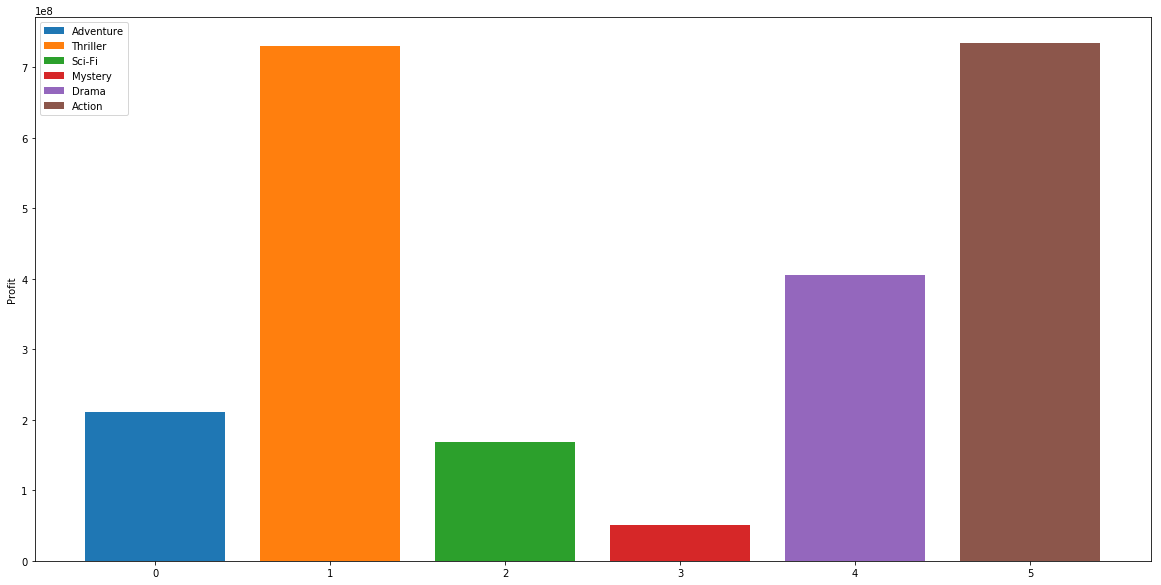

                             กำไรของหนังแต่ละเรื่องของ Christopher Nolan


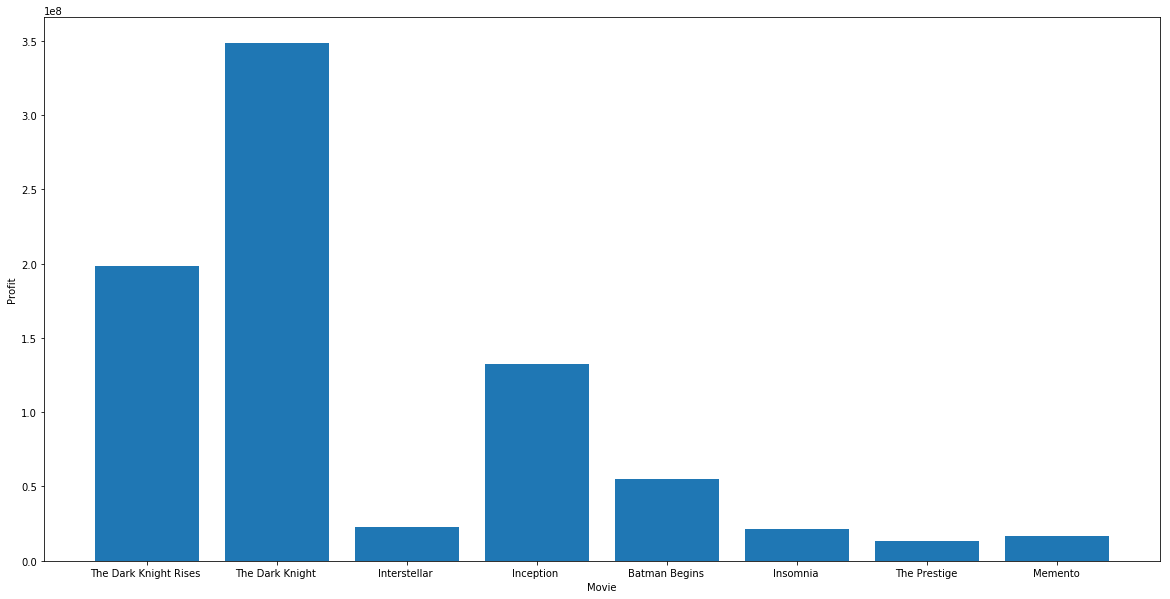

In [10]:
tmp = data[data['ชื่อผู้กำกับ'] == 'Christopher Nolan']
# print(tmp.columns)
import matplotlib.pyplot as plt

List = ['ประเภท: Reality-TV',\
    'ประเภท: Romance', 'ประเภท: Horror', 'ประเภท: Adventure',\
    'ประเภท: Film-Noir', 'ประเภท: Musical', 'ประเภท: Game-Show',\
    'ประเภท: Sci-Fi', 'ประเภท: Animation', 'ประเภท: War', 'ประเภท: News',\
    'ประเภท: Comedy', 'ประเภท: Mystery', 'ประเภท: Drama', 'ประเภท: Family',\
    'ประเภท: Thriller', 'ประเภท: Short', 'ประเภท: Western',\
    'ประเภท: Action', 'ประเภท: Documentary', 'ประเภท: Sport',\
    'ประเภท: Crime', 'ประเภท: Music', 'ประเภท: History',\
    'ประเภท: Biography', 'ประเภท: Fantasy']


objects = ['ประเภท: Adventure', 'ประเภท: Thriller', 'ประเภท: Sci-Fi', 'ประเภท: Mystery', 'ประเภท: Drama', 'ประเภท: Action']
name = ['Adventure', 'Thriller', 'Sci-Fi', 'Mystery', 'Drama', 'Action']

print('                             กำไรของหนังแต่ละเรื่องของ Christopher Nolan')
plt.figure(figsize=(20, 10))
for X in range(6):
    K = tmp[tmp[objects[X]] == 1]
    plt.bar(X, K['กำไรทั้งหมด'][K[objects[X]] == 1].sum())
    plt.legend(name)
plt.ylabel('Profit')
plt.show()

print('                             กำไรของหนังแต่ละเรื่องของ Christopher Nolan')
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(tmp['ชื่อหนัง'])), tmp['กำไรทั้งหมด'])
plt.xticks(np.arange(len(tmp['ชื่อหนัง'])), tmp['ชื่อหนัง'])
plt.ylabel('Profit')
plt.xlabel('Movie')
plt.show()


# print(tmp[['ชื่อหนัง','กำไรทั้งหมด']])
# print(tmp[List].sum())
# print(tmp[s][tmp[s] > 0])

# Create Model

In [11]:
from sklearn.svm import SVR, SVC

en = LabelEncoder()
en.fit(data['ชื่อหนัง'])
data['ชื่อหนัง'] = en.transform(data['ชื่อหนัง'])

def Fill_With_Regression(df, col):
    # เวลา train ต้องไม่มี nan
    forTrain = df.dropna()
    # ต้องการ fill nan ต้องให้ test เป็นทุกช่องที่มี nan ใน col นั้นๆ
    train, test = forTrain, df[df[col].isnull()]
    train_x, train_y = train.drop(col, axis=1), train[col]
    Reg = SVR() 
    # list column ของตัวที่ต้อง encode ก่อน 
    cc = list(train_x.columns)
    train_x = OneHotEncoder(train_x, cc)
    Reg.fit(train_x, train_y)
    if len(test) > 0:
        test_x, test_y = test.drop(col, axis=1), test[col]
        test_x = OneHotEncoder(test_x, cc)
        # predict
        pred = Reg.predict(test_x)
        # test_y = pd.DataFrame(pred)
        test_x[col] = pred
        # print(test_x[col])
        return test_x
    else:
        return df
    
def Fill_With_Classifier(df, col):
    forTrain = df.dropna()
    train, test = forTrain, df[df[col].isnull()]
    train_x, train_y = train.drop(col, axis=1), train[col]
    Cl = SVC()
    cc = list(train_x.columns)
    train_x = OneHotEncoder(train_x, cc)
    Cl.fit(train_x, train_y)
    if len(test) > 0:
        test_x, test_y = test.drop(col, axis=1), test[col] 
        test_x = OneHotEncoder(test_x, cc)
        pred = Cl.predict(test_x)
        # test_y = pd.DataFrame(pred)
        test_x[col] = pred
        # print(new_y.shape, new_x.shape)
        return test_x
    else:
        return df

# print(data.head(7))
# print('-'*50)
# for v in use2:


# print(data['กำไรทั้งหมด'].isnull().sum())
# data = data.append(tmp)

# Regression
ทำไมต้องใช้เทคนิคตัวนี้เนื่องจาก เรามีข้อมูลจำนวนมาก และมีตัวแปรที่เป็นตัวเลขที่สามารถทำให้ใช้เทคนิคนี้ได้ เราก็ใช่ข้อมูลที่เรามีอยู่ สร้างสมการถดถอย เผื่อทำนาย ค่าของข้อมูลที่ไม่ได้กรอกเข้าไป

### example

เรามี คู่อันดับดังรูป

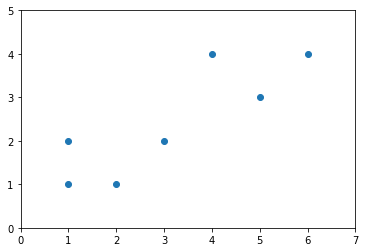

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 3, 4, 5, 6, 2, 1]
y = [2, 2, 4, 3, 4, 1, 1]

plt.scatter(x, y)
plt.xlim(0, 7)
plt.ylim(0, 5)
plt.show()

เราต้องการสร้าง สมการเส้นตรง ให้เป็นตัวแทนของข้อมูลชุดนี้ เราก็จะใช้เทคนิคได้หลายวิธี ทั้งเทคนิคทางสถิติเอง หรือที่เราจะนำเสนอนั้นคือเทคนิคของ machine learning 

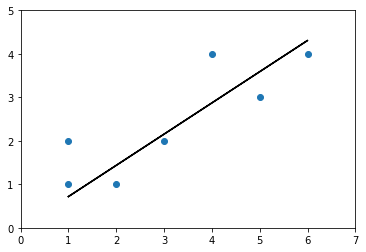

In [13]:
x = np.array(x, ndmin=2).T
y = np.array(y)
W = np.zeros(1)

alpha = 0.001
loop = 1000

for it in range(loop):
    h = np.dot(x, W)
    loss = h - y
    J = np.sum(loss ** 2) // (2*6)
    gradient = np.dot(loss, x) // 6
    W -= alpha * gradient
y_predict = W*x 

plt.scatter(x,y)
plt.plot(x,y_predict,'k-')
plt.xlim(0, 7)
plt.ylim(0, 5)
plt.show()

In [14]:
print('ก่อนจะ Regression:', sum(data.isnull().sum()))
for col in ['จำนวนนักวิจารณ์', 'ระยะเวลา', 'กำไรทั้งหมด', 'คะแนน IMDB']:
    tmp = Fill_With_Regression(data, col)
    print(col, 'เสร็จ')
    for i in tmp.index:
        # print(tmp.loc[i][col])
        data = data.set_value(i, col, tmp.loc[i][col])
print('หลังจาก Regression:', sum(data.isnull().sum()))

ก่อนจะ Regression: 1376
จำนวนนักวิจารณ์ เสร็จ
ระยะเวลา เสร็จ
กำไรทั้งหมด เสร็จ
คะแนน IMDB เสร็จ
หลังจาก Regression: 159


# Classification
เป็นเทคนิคที่ใช้ในการแบ่งกลุ่ม โดยข้อมูลที่จะใช่กับเทคนิคนี้ควรจะเป็นข้อมูลเชิงคุณภาพ 

In [15]:
print('ก่อนจะ Classifier:', sum(data.isnull().sum()))
for col in ['ชื่อผู้กำกับ', 'ชื่อนักแสดงที่1', 'ชื่อนักแสดงที่2', 'ชื่อนักแสดงที่3', 'ภาษา']:
    tmp = Fill_With_Classifier(data, col)
    print(col, 'เสร็จ')
    for i in tmp.index:
        data = data.set_value(i, col, tmp.loc[i][col])
print('หลังจาก Classifier:', sum(data.isnull().sum()))

ก่อนจะ Classifier: 159
ชื่อผู้กำกับ เสร็จ
ชื่อนักแสดงที่1 เสร็จ
ชื่อนักแสดงที่2 เสร็จ
ชื่อนักแสดงที่3 เสร็จ
ภาษา เสร็จ
หลังจาก Classifier: 0


ตอนนี้ เราก็ได้ทำการ fill ค่าใส่เข้าไปใน table เราหมดแล้ว

In [16]:
data.head(5)

ชื่อผู้กำกับ  จำนวนนักวิจารณ์    ระยะเวลา  กำไรทั้งหมด  ชื่อหนัง  \
0      James Cameron       723.000000  178.000000  523505847.0       396   
1     Gore Verbinski       302.000000  169.000000    9404152.0      2725   
2         Sam Mendes       602.000000  148.000000  -44925825.0      3274   
3  Christopher Nolan       813.000000  164.000000  198130642.0      3705   
4        Doug Walker       134.576939  105.624092     926504.0      3327   

   คะแนน IMDB  ชื่อนักแสดงที่1   ชื่อนักแสดงที่2       ชื่อนักแสดงที่3  \
0         7.9      CCH Pounder  Joel David Moore             Wes Studi   
1         7.1      Johnny Depp     Orlando Bloom        Jack Davenport   
2         6.8  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3         8.5        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4         7.1      Doug Walker        Rob Walker          Steve Coogan   

      ภาษา      ...        ประเภท: Fantasy  ประเภท: Drama  ประเภท: Game-Show  \
0  English      ...                      1              0                  0   
1  English      ...                      1              0                  0   
2  English      ...                      0              0                  0   
3  English      ...                      0              0                  0   
4  English      ...                      0              0                  0   

   ประเภท: Western  ประเภท: Romance  ประเภท: History  ประเภท: Biography  \
0                0                0                0                  0   
1                0                0                0                  0   
2                0                0                0                  0   
3                0                0                0                  0   
4                0                0                0                  0   

   ประเภท: Comedy  ประเภท: Musical  ประเภท: Sport  
0               0                0              0  
1               0                0              0  
2               0                0              0  
3               0                0              0  
4               0                0              0  

[5 rows x 36 columns]

In [17]:
# แปลง ชื่อหนังของเราที่ เอนโค๊ดทั้งหมด กลับมาเป็นชื่อเดิม เก็บไว้ใน titles เพื่อนำไปใช้ต่อ
titles = en.inverse_transform(data['ชื่อหนัง'])
# print(titles)

In [18]:
def get_movies(name):
    movies = []
    found = [i for i in titles if name.lower() in i.lower()]
    print('เจอ', found)
    movies.append(found[0])
    print('-'*30)
    print(movies)
    moviecodes = en.transform(movies)
    return moviecodes, movies

In [19]:
# ใส่หนังตรงบริเวณนี้ ***** 
names = input()
MovieCode, Name = get_movies(names)
print(MovieCode)

iron man
เจอ ['Iron Man 3\xa0', 'Iron Man\xa0', 'Iron Man 2\xa0']
------------------------------
['Iron Man 3\xa0']
[1896]


# KNN method (K-Nearest Neighbors)
เป็นอัลกอลิทึมที่เราได้เลือกใช้ หลักการค่อนข้างเข้าใจง่าย คือการหาเพื่อนบ้านใกล้ที่สุด K ตัว


In [20]:
data = OneHotEncoder(data, data.columns)

In [21]:
KNN = []

for movie in Name:
    for r in data.index:
        total = 0
        for c in ['จำนวนนักวิจารณ์', 'ระยะเวลา', 'กำไรทั้งหมด', 'คะแนน IMDB']:
            # Euclidien Distance 
            total += int((data[data['ชื่อหนัง'] == MovieCode[0]][c] - data.loc[r, c])**2)
            # Manhattan Distance
            # total += abs(data[data['ชื่อหนัง'] == MovieCode[0]][c] - data.loc[r, c])
        KNN += [(total**0.5, data.loc[r, 'ชื่อหนัง'])]
    

In [22]:
KNN = sorted(KNN)

In [23]:
print('หนัง 10 เรื่องที่เราแนะนำ')
print('-'*30)

for i, v in enumerate(KNN[1:11], start = 1):
    n = en.inverse_transform(v[1])
    print("%d: %s" % (i, n))

print('-'*30)

หนัง 10 เรื่องที่เราแนะนำ
------------------------------
1: Avengers: Age of Ultron 
2: Shrek 
3: The Hunger Games: Mockingjay - Part 1 
4: Toy Story 3 
5: Transformers: Revenge of the Fallen 
6: Batman 
7: Meet the Fockers 
8: The Dark Knight Rises 
9: Pirates of the Caribbean: Dead Man's Chest 
10: The Lego Movie 
------------------------------


# Naive Method
ใช้้วิธีการเลือกหนังประเภทเดียวกัน มีคะแนนมากๆ

In [23]:
names = input()
MovieCode, Name = get_movies(names)
print(MovieCode)

iron man 
เจอ ['Iron Man 3\xa0', 'Iron Man 2\xa0']
------------------------------
['Iron Man 3\xa0']
[1896]


In [24]:
ls = data
for c in data.columns:
    if int(data[data['ชื่อหนัง'] == MovieCode[0]][c]) == 1:
        print(c)
        ls = ls.loc[ls[c] == 1]

ประเภท: Sci-Fi
ประเภท: Action
ประเภท: Adventure


In [25]:
# ls

In [ ]:
ls.sort_values('คะแนน IMDB', ascending=False).head(10)

In [26]:
print('หนัง 10 เรื่องที่เราแนะนำ')
print('-'*30)

for i, v in enumerate(ls['ชื่อหนัง'][:10], start = 1):
    n = en.inverse_transform(v)
    print("%d: %s" % (i, n))

print('-'*30)

หนัง 10 เรื่องที่เราแนะนำ
------------------------------
1: Avatar 
2: John Carter 
3: Avengers: Age of Ultron 
4: Batman v Superman: Dawn of Justice 
5: Superman Returns 
6: Man of Steel 
7: The Avengers 
8: Men in Black 3 
9: Captain America: Civil War 
10: Battleship 
------------------------------
